### Original Paper Implementation
The original UNet model's implementation as described in the [paper](https://arxiv.org/pdf/1505.04597.pdf) 
### Applying UNet to a Realtime Dataset

#### Import Required Libraries and Utilities

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from UNetDataGenerator import NucleiDataGenerator
from Unet import Unet

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


#### Define Implementation details, Dataset criteria and Model hyper parameters

In [3]:
image_size = 256
image_channels = 3
image_dir = "data-science-bowl-2018/stage1_train/"
epochs = 5
batch_size = 8

# there are a total of 670 items at the train_path directory.
# so fixing 600 of data available for training set
# 50 for validation set and 20 for test set.
validation_data_size = 50
test_data_size = 20
train_data_size = 600

#### Define Reusable Methods

In [4]:
def VisualizeImageAndMask(image, mask, prediction_img = None):
    
    """
    
    Displays the image, mask and the predicted mask
    of the input image.
    
    Args:
        image: the original image.
        mask: the given mask of the image.
        prediction_img: the predicted mask of the image.
        
    Return:
        None
        
    """
    fig = plt.figure()
    fig.subplots_adjust(hspace = 0.6, wspace = 0.6)
    fig.suptitle('Image & Mask(s)', fontsize = 15)
    fig.subplots_adjust(top = 1.15)
    
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(image)
    setTitleAndRemoveTicks(ax, 'Microscopic\nImage')
    
    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(np.reshape(mask, (image_size, image_size)), cmap = "gray")
    setTitleAndRemoveTicks(ax, 'Original\nMask')
    
    if prediction_img is not None:
        ax = fig.add_subplot(1, 3, 3)
        ax.imshow(np.reshape(prediction_img, (image_size, image_size)), cmap = "gray")
        setTitleAndRemoveTicks(ax, 'Predicted\nMask')
    
def setTitleAndRemoveTicks(axes, title):
    
    """
    Sets the sub-plot title and removes the 
    x & y ticks on the respective axes.
    
    Args:
        axes: the subplot.
        title: title of the subplot.
        
    Return:
        None
        
    """
    
    # set plot title
    axes.title.set_text(title)
    
    # remove the ticks
    axes.set_xticks([])
    axes.set_yticks([])

#### Define Train, Test and Validation sets

In [5]:

image_ids = next(os.walk(image_dir))[1]

# partition the data into train, test and validation sets.
testing_data_ids = image_ids[:test_data_size]
validation_data_ids = image_ids[:validation_data_size]
training_data_ids = image_ids[:train_data_size]

#### Sample Data Visualization

In [6]:
temp_data_generator = NucleiDataGenerator(image_ids = training_data_ids, 
                                          img_path = image_dir, 
                                          batch_size = batch_size, 
                                          image_size = image_size)

# get one batch of data
images, masks = temp_data_generator.__getitem__(0)
print("Batch Dimension Details:", images.shape, masks.shape)

Batch Dimension Details: (8, 256, 256, 3) (8, 256, 256, 1)


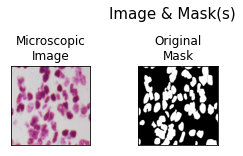

In [7]:
VisualizeImageAndMask(image = images[2], mask = masks[2])

In [8]:
temp_data_generator = None

### Model Training and Validation

#### Create UNet Model 

In [9]:
unet = Unet(input_shape = (image_size, image_size, image_channels), 
            filters = [16, 32, 64, 128, 256], 
            padding = "same")

# call the build netowrk API to build the network.
model = unet.Build_UNetwork()

In [10]:
# compile & summarize the model
if model is not None:
    unet.CompileAndSummarizeModel(model = model)

Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 16  2320        ['conv2d[0][0]']                 
                                )                                                              

 conv2d_18 (Conv2D)             (None, 256, 256, 1)  17          ['conv2d_17[0][0]']              
                                                                                                  
Total params: 1,941,105
Trainable params: 1,941,105
Non-trainable params: 0
__________________________________________________________________________________________________


#### Data Generators

In [11]:
train_gen = NucleiDataGenerator(image_ids = training_data_ids, 
                                img_path = image_dir, 
                                image_size = image_size, 
                                batch_size = batch_size)

valid_gen = NucleiDataGenerator(image_ids = validation_data_ids, 
                                img_path = image_dir, 
                                image_size = image_size, 
                                batch_size = batch_size)

test_gen = NucleiDataGenerator(image_ids = testing_data_ids, 
                               img_path = image_dir, 
                               image_size = image_size, 
                               batch_size = batch_size)

train_steps = len(training_data_ids)//batch_size
valid_steps = len(validation_data_ids)//batch_size

#### Model Training

In [12]:
model.fit(train_gen, 
          validation_data = valid_gen, 
          steps_per_epoch = train_steps, 
          validation_steps = valid_steps, 
          epochs = epochs)

Epoch 1/5
75/75 [==============================] - 534s 7s/step - loss: 0.3916 - acc: 0.8524 - val_loss: 0.2563 - val_acc: 0.8594
Epoch 2/5
75/75 [==============================] - 201s 3s/step - loss: 0.2125 - acc: 0.8778 - val_loss: 0.1767 - val_acc: 0.9377
Epoch 3/5
75/75 [==============================] - 1981s 27s/step - loss: 0.1536 - acc: 0.9292 - val_loss: 0.1318 - val_acc: 0.9377
Epoch 4/5
75/75 [==============================] - 209s 3s/step - loss: 0.1065 - acc: 0.9516 - val_loss: 0.1049 - val_acc: 0.9500
Epoch 5/5
75/75 [==============================] - 205s 3s/step - loss: 0.0933 - acc: 0.9571 - val_loss: 0.1005 - val_acc: 0.9509


### Model Testing and Prediction Visualizations

In [16]:
# get the test set images
test_images, test_masks = test_gen.__getitem__(1)
predicted_masks = model.predict(test_images)

predicted_masks = predicted_masks > 0.5

1/1 [==============================] - 1s 593ms/step


#### Viz 1

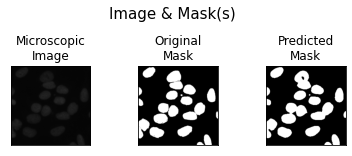

In [17]:
VisualizeImageAndMask(image = test_images[1], mask = test_masks[1], prediction_img = predicted_masks[1])

#### Viz 2

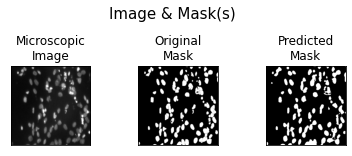

In [18]:
VisualizeImageAndMask(image = test_images[3], mask = test_masks[3], prediction_img = predicted_masks[3])

#### Viz 3

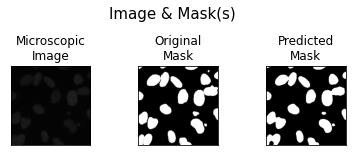

In [19]:
VisualizeImageAndMask(image = test_images[6], mask = test_masks[6], prediction_img = predicted_masks[6])

### Conclusion

Comparing the microscopic image, original mask and the predicted mask, it looks like the model is correctly able to segment the cell nuclei and generate the masks.

Though UNet was originally designed for bio-medical images, this model can be applied to any conputer vision segmentation task.